# Classification Model
* classify the compound as either **musk** or **non-musk**
* using Artificial Neural Network 

In [2]:
import os

In [3]:
os.getcwd()

'/content'

Change current working directory

In [5]:
os.chdir("/content/drive/MyDrive/Dataset")

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.optimizers import Adam

## Importing the dataset from csv file

In [7]:
data=pd.read_csv("musk_csv.csv",index_col=False)
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


Find the shape of the data

In [8]:
data.shape

(6598, 170)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [10]:
#Describe the dataset
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

# Data preprocessing

Find the Null values in dataset.

In [11]:
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

Find the duplicated rows in dataset

In [12]:
data.duplicated().sum()

0

In [13]:
#Get the length of unique values in column "molecule_name"
len(data["molecule_name"].unique())

102

In [14]:
#Get the length of unique values in column "conformation_name"
len(data["conformation_name"].unique())

6598

#### Dropping the Columns **ID** and **conformation_name**

In [15]:
data.drop(["conformation_name","ID"],inplace=True,axis=1)

In [16]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1]

In [17]:
X

array([['MUSK-211', 46, -108, ..., -50, -112, 96],
       ['MUSK-211', 41, -188, ..., -61, -136, 79],
       ['MUSK-211', 46, -194, ..., -67, -145, 39],
       ...,
       ['NON-MUSK-jp13', 44, -102, ..., -66, -144, -6],
       ['NON-MUSK-jp13', 51, -121, ..., -44, -116, 117],
       ['NON-MUSK-jp13', 51, -122, ..., -44, -115, 118]], dtype=object)

In [18]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64

### Label Encoding
It is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [20]:
X[:,0]=labelencoder.fit_transform(X[:, 0])
X

array([[0, 46, -108, ..., -50, -112, 96],
       [0, 41, -188, ..., -61, -136, 79],
       [0, 46, -194, ..., -67, -145, 39],
       ...,
       [101, 44, -102, ..., -66, -144, -6],
       [101, 51, -121, ..., -44, -116, 117],
       [101, 51, -122, ..., -44, -115, 118]], dtype=object)

### Scaling the Data
It is used to normalize the range of independent variables or features of data.

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [22]:
X

array([[-2.22097135, -0.24312408,  0.12255207, ..., -0.04561267,
         0.50333227,  0.5762445 ],
       [-2.22097135, -0.33702966, -0.7584422 , ..., -0.24537589,
         0.18759789,  0.39560282],
       [-2.22097135, -0.24312408, -0.82451677, ..., -0.35433764,
         0.06919749, -0.02943645],
       ...,
       [ 1.49457534, -0.28068632,  0.18862664, ..., -0.33617735,
         0.08235309, -0.50760562],
       [ 1.49457534, -0.1492185 , -0.0206095 , ...,  0.06334909,
         0.45070987,  0.79939012],
       [ 1.49457534, -0.1492185 , -0.03162193, ...,  0.06334909,
         0.46386547,  0.8100161 ]])

### Splitting the data into Training and Test Sets
This technique split the data in 80:20 ratio respectively in training and test set.

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.20, random_state = 0)

# Building Artificial Neural Network model

In [24]:
# Initializing
classifier=Sequential()

In [25]:
classifier.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=167))
classifier.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [26]:
#Setting the Optimizer
opt=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [27]:
# Compile Model
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
# Fitting the Model
history = classifier.fit(X_train,
                         y_train,
                         validation_data = (X_test,y_test),
                         epochs=30,
                         batch_size=16)

Epoch 1/30
330/330 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.8401 - val_loss: 0.3204 - val_accuracy: 0.8485
Epoch 2/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8488 - val_loss: 0.2432 - val_accuracy: 0.8902
Epoch 3/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9102 - val_loss: 0.1723 - val_accuracy: 0.9280
Epoch 4/30
330/330 [==============================] - 0s 1ms/step - loss: 0.1454 - accuracy: 0.9437 - val_loss: 0.1196 - val_accuracy: 0.9553
Epoch 5/30
330/330 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9655 - val_loss: 0.0829 - val_accuracy: 0.9705
Epoch 6/30
330/330 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9771 - val_loss: 0.0572 - val_accuracy: 0.9841
Epoch 7/30
330/330 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9903 - val_loss: 0.0381 - val_accuracy: 0.9947
Epoch 

## Training and Validation accuracy and Loss graph


In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

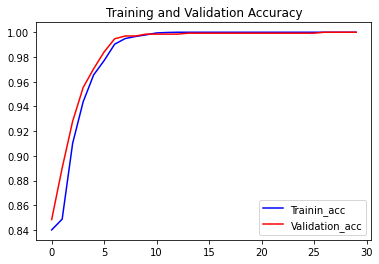

In [30]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

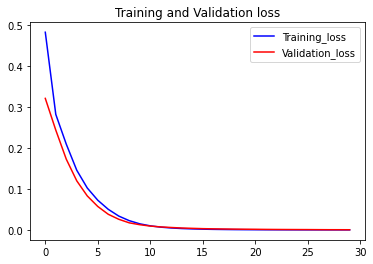

In [31]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [32]:
y_pred=classifier.predict(X_test)
y_pred=np.where(y_pred>0.5,1,0)    # Convert the "y_pred" continuous value into discrete value
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
# find the confusion matrix on prediction data
cm = confusion_matrix(y_test, y_pred)
cm

array([[1120,    0],
       [   0,  200]])

In [35]:
accuracy_score(y_test,y_pred)

1.0

### validation accuracy, precision, recall, F1 score.

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



### Save the trained Model

In [37]:
classifier.save('musk_model.h5')